In [10]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
X_train = np.linspace(-3, 3, 100).reshape(-1, 1)  # 10 points in 1D
y_train = np.sin(X_train) + 0.1 * np.random.randn(100, 1)  # add small noise



(100, 1) (100, 1)


In [8]:
def rbf_kernel(X1, X2, sigma=1.0):
    X1_expanded = X1[:, np.newaxis, :]  # shape (n1, 1, d)
    X2_expanded = X2[np.newaxis, :, :]  # shape (1, n2, d)
    dist_sq = np.sum((X1_expanded - X2_expanded)**2, axis=2)
    return np.exp(-dist_sq / (2 * sigma**2))

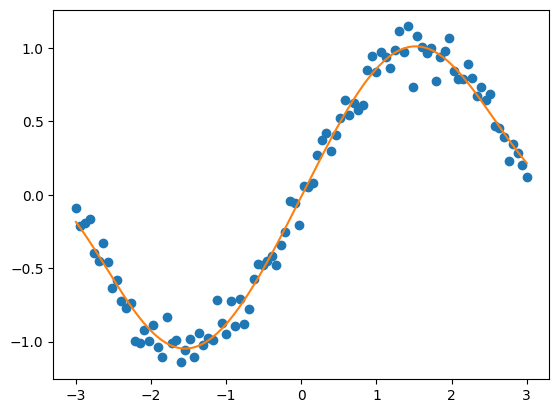

In [19]:
# ITERATIVE METHOD
# a <- a - lr * (K @ a - y + lambda * a)
def train_kernel(X, y, kernel):
    alpha_0 = np.zeros(len(X))
    K = kernel(X, X)
    for _ in range(100):
        alpha_0 = alpha_0 - 0.01 * (K @ alpha_0 - y.reshape(-1) + 0.1 * alpha_0)
    return alpha_0

def predict_kernel(X_train, y_train, alpha, kernel, X_test):
    K = kernel(X_test, X_train)
    return K @ alpha

alpha = train_kernel(X_train, y_train, rbf_kernel)

X_test = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_pred = predict_kernel(X_train, y_train, alpha, rbf_kernel, X_test)

plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_pred)
plt.show()

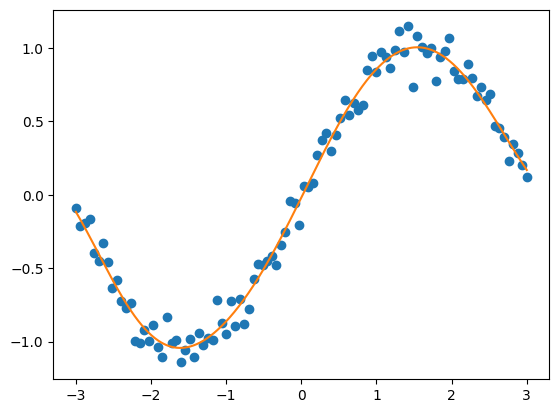

In [21]:
# CLOSED FORM METHOD
# Let a <- a - lr * (K @ a - y + lambda * a) be the update rule. If it converges to a fixed point a*, then
# a* = a* - lr * (K @ a* - y + lambda * a) -> K @ a* +  lambda * a* = y-> a* = (K + lambda * I)^-1 @ y

def train_kernel_closed_form(X, y, kernel):
    K = kernel(X, X)
    return np.linalg.inv(K + 0.1 * np.eye(len(X))) @ y

alpha = train_kernel_closed_form(X_train, y_train, rbf_kernel)
y_pred = predict_kernel(X_train, y_train, alpha, rbf_kernel, X_test)

plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_pred)
plt.show()